#빅데이터_분석&시각화 #미니실습,

텍스트 마이닝,

감성 분석

1. 모델을 새로운 학습 아니라, 학습된 모델을 불러와서, 활용하기.

2. 임의로 입력된 문장을 긍정, 부정 분류 작업

3. 뉴스, 블로그, 네이버 API 이용해서 데이터를 추출.

4. 긍정 뉴스, 부정 뉴스 , 상위 15개 시각화,

5. LDA 시각화, 토픽 4개 추출, 토픽 마다 특정 단어들이 높은 확률로
등장하는 부분 시각화,


In [6]:
# 기본 도구 가져오기
# konlpy 에서 okt 를 import
# okt는 단어의 형태소를 구분하는데 사용 okt.nouns와 같이
# 이것을 응용하여 tokenizer 함수를 정의하고 이것을 vectorizer 에 사용할 수 있음
# sklearn에서 tfidfVectorizer import
# TfidfVectorizer 는 tokenizer, ngram_range, min_df, max_df 를 옵션으로 갖는다
# tokenizer 는 okt를 이용해 토크나이저를 정의한 것을 쓰고
# ngram_range는 연속된 단어를 몇 단어까지 고려할것인지 정의하는것 예를들어 ngram_range=(1,2)는 1단어부터 2단어까지 연속단어로 취급해 하나의 특징으로 본다 뜻
# min_df 는 단어가 등장한 문서의 최소비율 개수 사용, 3을 쓰면 3개 이상의 문서에서 등장한 단어만 벡터화 아주 적은 표본은 의미가 없다는 뜻
# max_df 는 단어가 등장한 문서의 최대비율 비율 사용, 0.8을 쓰면 80% 이상의 문서에서 등장한 단어는 상용단어라 판단하고 제외
import pickle
from konlpy.tag import Okt
okt = Okt()

def okt_tokenizer(text):
  tokens = okt.morphs(text)
  return tokens

In [7]:
#학습된 모델 가져오기, tfidf, 영화평점, 약 학습,평가요 총
# 약 20만개 데이터를 기준으로 학습된 모델 불러오기.
tfidf_model_save_path = "./tfidf_model.pkl"
with open(tfidf_model_save_path, "rb") as file:
    tfidf = pickle.load(file)

print("✅ TF-IDF 모델 불러오기 완료")

✅ TF-IDF 모델 불러오기 완료


In [8]:

model_save_path = "./SA_lr_best.pkl"
with open(model_save_path, "rb") as file:
    SA_lr_best = pickle.load(file)

print("✅ 모델 불러오기 완료")


✅ 모델 불러오기 완료


In [9]:
# 학습된 모델을 평가 했더니, 정확도 약 85% 정도 일치
# 긍정, 부정을 분석 일치 여부.
# 임의로, 특정의 문장을 , 이 모델에 입력시키면, 그 결과가, 긍정?, 부정? 판단을 해줌.
# 정확도 약85% 이지만, 생각보다 성능이 많이 떨어짐. 참고하고
st = input("감성 분석하기위한 문장을 입력 해주세요: ")


In [10]:
import re

st = re.compile(r"[ㄱ - | 가-힣]+").findall(st)
print(st)
st = [" ".join(st)]
print(st)


['오늘도 운동가자']
['오늘도 운동가자']


In [11]:
# 해당 문장을 분석하기 좋게 벡터화 과정.
st_tfidf = tfidf.transform(st)

In [12]:
# 만들어둔 모델을 이용해서, 예측값 구하기(평가)
st_predict = SA_lr_best.predict(st_tfidf)

In [13]:
# 긍정 인지, 부정인지 판별하기.
if(st_predict == 0):
  print(st," -> 부정")
else:
  print(st," -> 긍정")

['오늘도 운동가자']  -> 긍정


In [ ]:
#3

In [14]:
# 코로나 뉴스 json -> 메모리에 불러오기.
import json
file_name = '트럼프_naver_news'
with open("./"+file_name+'.json',encoding='utf-8') as j_f:
  data = json.load(j_f)
print(data)

[{'cnt': 1, 'description': '로이터통신은 이날 <b>트럼프</b> 행정부 소식통들을 인용해 이같이 전하면서 특히 도널드 <b>트럼프</b> 대통령은 이날 오후 9시10분(한국시간 5일 오전 11시 10분) 시작하는 상·하원 합동회의 연설 때 협정 합의를 발표하길 희망한다는... ', 'link': 'https://www.mk.co.kr/article/11255654', 'org_link': 'https://www.mk.co.kr/article/11255654', 'pDate': '2025-03-05 09:15:00', 'title': '“싸운 건 ‘쇼’”...로이터, “미-우크라 간 광물협정 체결할 수도”'}, {'cnt': 2, 'description': "중국 국무원은 5일 올해 경제성장률 목표치를 '5%안팎'으로 제시했다. ※CBS노컷뉴스는 여러분의 제보로 함께 세상을 바꿉니다. 각종 비리와 부당대우, 사건사고와 미담 등 모든 얘깃거리를 알려주세요.이메일... ", 'link': 'https://www.nocutnews.co.kr/news/6302637?utm_source=naver&utm_medium=article&utm_campaign=20250305091420', 'org_link': 'https://www.nocutnews.co.kr/news/6302637?utm_source=naver&utm_medium=article&utm_campaign=20250305091420', 'pDate': '2025-03-05 09:15:00', 'title': "[속보]<b>트럼프</b>發 '무역전쟁'에도 中 올해 경제성장률 '5% 안팎' 목표"}, {'cnt': 3, 'description': '도널드 <b>트럼프</b> 미국 대통령 [연합뉴스]  <b>트럼프</b> 행정부의 관세전쟁이 격화하면서 뉴욕증시가 2일 연속 하락 마감했다. 4일(미국 현지시간) 뉴욕증권거래소(NYSE)에 따르면 이날 다우존스30산업평균지수는 전장보다... ', '

In [15]:
# 해당 기사의 제목, 내용에 대해서,
# 기본적인 전처리 작업.
# 제목, 내용을 담을 임시 리스트 만들기.
data_title = []
data_description = []

for item in data:
  data_title.append(item["title"])
  data_description.append(item["description"])

# data_title
data_description

['로이터통신은 이날 <b>트럼프</b> 행정부 소식통들을 인용해 이같이 전하면서 특히 도널드 <b>트럼프</b> 대통령은 이날 오후 9시10분(한국시간 5일 오전 11시 10분) 시작하는 상·하원 합동회의 연설 때 협정 합의를 발표하길 희망한다는... ',
 "중국 국무원은 5일 올해 경제성장률 목표치를 '5%안팎'으로 제시했다. ※CBS노컷뉴스는 여러분의 제보로 함께 세상을 바꿉니다. 각종 비리와 부당대우, 사건사고와 미담 등 모든 얘깃거리를 알려주세요.이메일... ",
 '도널드 <b>트럼프</b> 미국 대통령 [연합뉴스]  <b>트럼프</b> 행정부의 관세전쟁이 격화하면서 뉴욕증시가 2일 연속 하락 마감했다. 4일(미국 현지시간) 뉴욕증권거래소(NYSE)에 따르면 이날 다우존스30산업평균지수는 전장보다... ',
 '일부 언론에서 <b>트럼프</b> 행정부 인사들을 인용해 발표가 임박한 것으로 보도했지만 주무 장관은 시기상조라는 인식을 드러낸 것이다. 로이터통신은 4일(현지시간) <b>트럼프</b> 행정부 소식통들을 인용해 양국이 광물 협정에... ',
 '도널드 <b>트럼프</b> 미국 대통령이 개입해 타결이 임박한 것처럼 보였던 PGA 투어와 LIV 골프 통합 협상이 이른 시일 안에 마무리되기 쉽지 않다는 뜻이다. <b>트럼프</b> 대통령은 최근 2차례나 모너핸 커미셔너를 포함한 PGA 투어... ',
 '도널드 <b>트럼프</b> 대통령의 예고대로 이날 주요 무역국에 대한 관세 부과에 이어 상대국들도 즉각 보복관세로 맞불을 놓으면서 글로벌 무역전쟁 우려 확대 속에 이 같은 흐름이 나타났다고 미국 경제방송... ',
 '‘영국판 <b>트럼프</b>’로 불리는 나이절 패라지 영국개혁당 대표도 “(밴스는) 틀렸다, 틀렸다, 틀렸다”면서 영국은 아프가니스탄에서 20년 동안 ‘미국의 편’에 섰다고 강조했습니다. 프랑스군 대령 출신인 미셸 고야도... ',
 '도널드 <b>트럼프</b> 대통령이 파나마 운하를 미국이 소유해야 한다는 주장의 근거로 삼았던 홍

In [16]:
# 리스트 -> 데이터 프레임 (표) 형태로 변환
import pandas as pd
data_df = pd.DataFrame({"title":data_title, "description" : data_description})
data_df.head()

,title,description
0,"“싸운 건 ‘쇼’”...로이터, “미-우크라 간 광물협정 체결할 수도”",로이터통신은 이날 <b>트럼프</b> 행정부 소식통들을 인용해 이같이 전하면서 특히...
1,[속보]<b>트럼프</b>發 '무역전쟁'에도 中 올해 경제성장률 '5% 안팎' 목표,중국 국무원은 5일 올해 경제성장률 목표치를 '5%안팎'으로 제시했다. ※CBS노컷...
2,"뉴욕증시, 관세전쟁 격화에 2일 연속 하락 마감",도널드 <b>트럼프</b> 미국 대통령 [연합뉴스] <b>트럼프</b> 행정부의 ...
3,美-우크라 광물협정 임박 보도에…美재무 “지금은 아냐”,일부 언론에서 <b>트럼프</b> 행정부 인사들을 인용해 발표가 임박한 것으로 보도...
4,<b>트럼프</b> 개입했지만...PGA 투어 커미셔너 &quot;LIV와 통합 쉽...,도널드 <b>트럼프</b> 미국 대통령이 개입해 타결이 임박한 것처럼 보였던 PGA...


In [17]:
# 전처리, 1)제목 2)내용 한글만 남기기 작업.
# re (regex 정규식) 이용해서, 한글만 남기기.
import re
# 제목에서 한글만 추출
data_df["title"]= data_df["title"].apply(lambda x: re.sub(r'[^ ㄱ - | 가-힣]+'," ",x))
# 내용에서 한글만 추출
data_df["description"]= data_df["description"].apply(lambda x: re.sub(r'[^ ㄱ - | 가-힣]+'," ",x))
data_df.head()


,title,description
0,싸운 건 쇼 로이터 미 우크라 간 광물협정 체결할 수도,로이터통신은 이날 트럼프 행정부 소식통들을 인용해 이같이 전하면서 특히 도널드 ...
1,속보 트럼프 무역전쟁 에도 올해 경제성장률 안팎 목표,중국 국무원은 일 올해 경제성장률 목표치를 안팎 으로 제시했다 노컷뉴스는 여...
2,뉴욕증시 관세전쟁 격화에 일 연속 하락 마감,도널드 트럼프 미국 대통령 연합뉴스 트럼프 행정부의 관세전쟁이 격화하면...
3,우크라 광물협정 임박 보도에 재무 지금은 아냐,일부 언론에서 트럼프 행정부 인사들을 인용해 발표가 임박한 것으로 보도했지만 주...
4,트럼프 개입했지만 투어 커미셔너 와 통합 쉽지 않다,도널드 트럼프 미국 대통령이 개입해 타결이 임박한 것처럼 보였던 투어와 ...


In [18]:
# 벡터화 작업
data_title_tfidf = tfidf.transform(data_df["title"])

In [19]:
data_title_predict = SA_lr_best.predict(data_title_tfidf)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

title_label
0    594
1    406
Name: count, dtype: int64
description_label
0    559
1    441
Name: count, dtype: int64
[['로이터', '통신', '날', '트럼프', '행정부', '소식통', '인용', '전하', '면서', '도널드', '트럼프', '대통령', '날', '오후', '시', '분', '한국', '시간', '일', '오전', '시', '분', '시작', '상', '하원', '합동', '회의', '연설', '때', '협정', '합의', '발표', '희망'], ['중국', '국무원', '일', '올해', '경제성장률', '목표', '안팎', '제시', '노컷뉴스', '여러분', '제보', '세상', '각종', '비리', '부당', '대우', '사건', '사고', '미담', '등', '모든', '얘깃', '거리', '이메일'], ['트럼프', '정부', '러시아', '제재', '완화', '추진', '로이터', '통신', '보도', '대해', '선', '제재', '해제', '러시아', '미국', '관계', '정상화', '수', '강조', '페', '스코프', '대변인', '우리', '양국', '관계', '정상화', '관해', '얘기'], ['온타리오', '퀘벡', '등', '캐나다', '주요', '주', '일', '현지', '시간', '도널드', '트럼프', '미국', '행정부', '관세', '부과', '미국', '산', '술', '판매', '금지', '더그', '포드', '온타리오', '지사', '미국', '산', '알코올', '판매', '금지', '조치', '발표'], ['도널드', '트럼프', '미국', '대통령', '전쟁', '중인', '우크라이나', '군사', '원조', '잠정', '중단', '유럽', '국가', '안보', '우려', '감', '유럽', '정상', '트럼프', '대통령', '탈', '세계', '정책', '가시', '군사력', '증강'], 

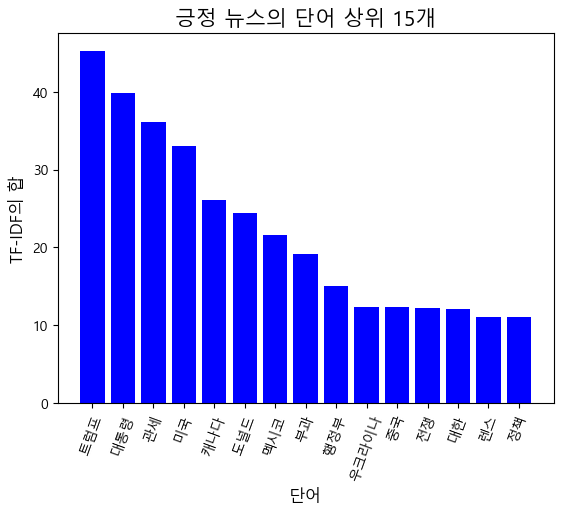

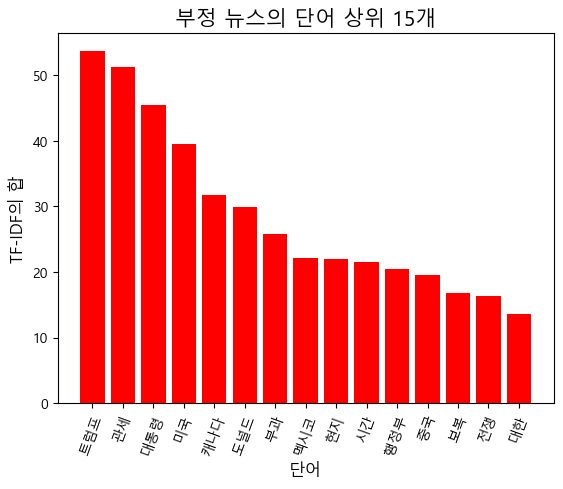

In [22]:
# 예측값을 새로운 컬럼으로 사용하기.
data_df["title_label"] = data_title_predict
# description , 같은 작업 반복
# 벡터화 작업
data_description_tfidf = tfidf.transform(data_df["description"])
# 학습이 된 감성 분석 모델을 이용해서, 해당 제목으로, 긍정, 부정인지 평가하기.
data_description_predict = SA_lr_best.predict(data_description_tfidf)
# 예측값을 새로운 컬럼으로 사용하기.
data_df["description_label"] = data_description_predict
data_df.head()
# 파일 csv 로 옮기기
data_df.to_csv("./" + file_name + ".csv", encoding="utf-8")
# 간단히, 해당 제목, 내용이 , 긍정, 부정의 글의 갯수가 몇개인지 파악해보기.
print(data_df["title_label"].value_counts())
print(data_df["description_label"].value_counts())
# 제목, 내용 분리 작업.
columns_name = ['title', 'title_label', 'description', 'description_label']
NEG_data_df = pd.DataFrame(columns=columns_name)
POS_data_df = pd.DataFrame(columns=columns_name)

for i, data in data_df.iterrows():
    title = data["title"]
    description = data["description"]
    t_label = data["title_label"]
    d_label = data["description_label"]

    if d_label == 0:  # 부정 감성 샘플만 추출
        # NEG_data_df = NEG_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
        new_data_df = pd.DataFrame([[title, t_label, description, d_label]], columns=columns_name)
        NEG_data_df = pd.concat([NEG_data_df, new_data_df], ignore_index=True)
    else:  # 긍정 감성 샘플만 추출
        # POS_data_df = POS_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
        new_data_df = pd.DataFrame([[title, t_label, description, d_label]], columns=columns_name)
        POS_data_df = pd.concat([POS_data_df, new_data_df], ignore_index=True)
# 파일에 저장.
NEG_data_df.to_csv('./' + file_name + '_NES.csv', encoding='utf-8')
POS_data_df.to_csv('./' + file_name + '_POS.csv', encoding='utf-8')
len(NEG_data_df), len(POS_data_df)
POS_description = POS_data_df['description']
POS_description_noun_tk = []

for d in POS_description:
    POS_description_noun_tk.append(okt.nouns(d))  #형태소가 명사인 것만 추출
print(POS_description_noun_tk)  #작업 확인용 출력
POS_description_noun_join = []

for d in POS_description_noun_tk:
    d2 = [w for w in d if len(w) > 1]  #길이가 1인 토큰은 제외
    POS_description_noun_join.append(" ".join(d2))  # 토큰을 연결(join)하여 리스트 구성
print(POS_description_noun_join)  #작업 확인용 출력
NEG_description = NEG_data_df['description']

NEG_description_noun_tk = []
NEG_description_noun_join = []

for d in NEG_description:
    NEG_description_noun_tk.append(okt.nouns(d))  #형태소가 명사인 것만 추출

for d in NEG_description_noun_tk:
    d2 = [w for w in d if len(w) > 1]  #길이가 1인 토큰은 제외
    NEG_description_noun_join.append(" ".join(d2))  # 토큰을 연결(join)하여 리스트 구성
print(NEG_description_noun_join)  #작업 확인용 출력
POS_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=2)
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)
POS_vocab = dict()

for idx, word in enumerate(POS_tfidf.get_feature_names_out()):
    POS_vocab[word] = POS_dtm.getcol(idx).sum()

POS_words = sorted(POS_vocab.items(), key=lambda x: x[1], reverse=True)
POS_words  #작업 확인용 출력
NEG_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=2)
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)
NEG_vocab = dict()

for idx, word in enumerate(NEG_tfidf.get_feature_names_out()):
    NEG_vocab[word] = NEG_dtm.getcol(idx).sum()

NEG_words = sorted(NEG_vocab.items(), key=lambda x: x[1], reverse=True)
NEG_words  #작업 확인용 출력
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm._get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

max = 15  #바 차트에 나타낼 단어의 수
plt.bar(range(max), [i[1] for i in POS_words[:max]], color="blue")
plt.title("긍정 뉴스의 단어 상위 %d개" % max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation=70)

plt.show()
plt.bar(range(max), [i[1] for i in NEG_words[:max]], color="red")
plt.title("부정 뉴스의 단어 상위 %d개" % max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation=70)

plt.show()

In [ ]:
#5

In [24]:
import gensim
import gensim.corpora as corpora

description = data_df['description']
description_noun_tk = []

for d in description:
    description_noun_tk.append(okt.nouns(d))  #형태소가 명사인 것만 추출
# okt.nouns(d) d에서 명사들을 리스트 형태로 반환
# 이것을 리스트에 추가하니 description_noun_tk 는 리스트리스트형태
description_noun_tk2 = []

for d in description_noun_tk:
    # 이 리스트리스트에서 리스트를 하나씩 꺼내서 리스트 안에 있는 명사들을 꺼내고 이 명사의 길이가 1초과만 리스트컴프리헨션으로 만든걸 item 에 할당하고 tk2에 추가 즉 tk에서 두글자이상인 명사만 필터링한 리스트리스트형태 맞지?
    item = [i for i in d if len(i) > 1]  #토큰의 길이가 1보다 큰 것만 추출
    description_noun_tk2.append(item)
dictionary = corpora.Dictionary(description_noun_tk2)
# corpora.Dictionary() 리스트를 받아 각각의 내용에(단어에) 인덱스를 부여한 dictionary 작성
# 이 dictionary는 {'단어1':0,'단어2':1,'단어3':2 ..... }의 형태
print(dictionary[1])  #작업 확인용 출력
# 아래의 for word in description_noun_tk2 는 tk2 가 리스트리스트이므로 실제론 word 가 아니라 리스트(하나의 description 내의 2글자 이상 단어 리스트)
# 즉 각각의 description 의 2글자 이상 단어 리스트를 받아서 단어들이 몇번 등장했는지 세어 dictionary 에 지정된 인덱스와 등장횟수의 튜플로 만들어줌
# 이 튜플을 리스트안에 넣은 것을 corpus 에 할당
# 결과적으로 corpus = [(단어1의 인덱스,등장횟수),(단어2의 인덱스,등장횟수),(단어3의 인덱스,등장횟수),(단어4의 인덱스,등장횟수),...]의 형태
corpus = [dictionary.doc2bow(word) for word in description_noun_tk2]
print(corpus)  #작업 확인용 출력
# ✔️ LDA는 문서에서 숨겨진 토픽을 찾아내는 알고리즘
# ✔️ 토픽을 정의할 필요 없이, 문서에서 자동으로 토픽을 추출
# ✔️ 토픽마다 특정 단어들이 높은 확률로 등장
# ✔️ 각 문서가 어떤 토픽에 속하는지 분석 가능
k = 4  #토픽의 개수 설정
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations=12, num_topics=k, id2word=dictionary, passes=1,
                                                    workers=10)
# corpus: 문서를 토큰화하여 BOW(Bag-of-Words) 형식으로 변환한 데이터
# iterations=12: 각 문서에서 토픽을 업데이트하는 반복 횟수
# num_topics=k: 찾을 토픽 개수 (여기서는 4개)
# id2word=dictionary: 단어 ID와 단어 매핑 정보
# passes=1: 전체 데이터셋을 몇 번 학습할지 (값이 클수록 학습이 더 많이 됨)
# workers=10: 병렬처리를 위한 CPU 코어 개수

print(lda_model.print_topics(num_topics=k, num_words=15))
#최초 한번만 설치
# !pip install pyLDAvis
# !pip install --upgrade pandas
import pickle

with open("lda_model.pkl", "wb") as f:
    pickle.dump(lda_model, f)

import pyLDAvis.gensim

lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
# lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, n_jobs=1)

도널드
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)], [(0, 1), (1, 1), (6, 1), (14, 2), (19, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)], [(2, 1), (4, 1), (5, 1), (6, 1), (11, 2), (13, 1), (14, 2), (19, 2), (20, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1)], [(0, 2), (1, 1), (14, 2), (51, 1), (70, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 1), (83, 1)], [(0, 1), (1, 1), (14, 1), (46, 2), (51, 1), (56, 1), (84, 1), (85, 1

In [25]:
pyLDAvis.display(lda_vis)